In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import dblquad
from scipy.integrate import tplquad
import pandas as pd

# Moment of Inertia in Python

# Analytical Case

Define the radius as a function of $\theta$. The region we are interested for this function is $\pi/4 < \theta < \pi/2$

In [2]:
def f(t):
    return 1 - np.pi/4 + t**(1/10)

Plot this function in the specified $\theta$ range

In [3]:
t = np.linspace(np.pi/4, np.pi/2, 1000)
A = f(t)

Text(0.5, 1.0, 'Side of Spinning Top in Cylindrical Coordinates')

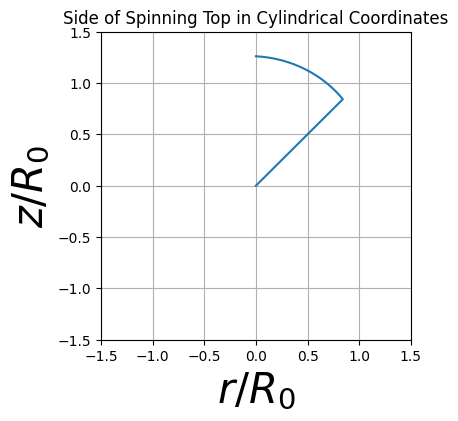

In [4]:
plt.figure(figsize=(4,4))
plt.plot(np.insert(A*np.cos(t), 0, 0), np.insert(A*np.sin(t), 0, 0))
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.grid()
plt.ylabel('$z/R_0$', fontsize=30)
plt.xlabel('$r/R_0$', fontsize=30)
plt.title('Side of Spinning Top in Cylindrical Coordinates')

The kinetic energy of the spinning top (with its tip fixed on the plane) is given by

$$T = \frac{1}{2} \omega^T I\omega = \frac{1}{2} \begin{bmatrix} \omega_x&\omega_y&\omega_z \end{bmatrix}\begin{bmatrix}I_x & I_{xy} & I_{xz}\\ I_{yx} & I_{y} & I_{yz}\\ I_{zx} & I_{zy} & I_{z}\end{bmatrix} \begin{bmatrix} \omega_x\\\omega_y\\\omega_z \end{bmatrix}$$

Note that this matrix is symmetric so there are 6 unique parameters. We will find $I_x$, $I_y$, and $I_z$ and show that all off diagonal terms (such as $I_{xy}$) are 0. Furthermore, since moment of intertias are typically given by

$$I = ... MR_0^2$$

for some characteristic length $R_0$ and mass $M$, we're also going to want to find the mass $M$

## Moment of Inertial About About Z-Axis

$$I_z = \iiint \rho(x, y, z) (x^2+y^2) dV = \int_Z \int_r \int_0^{2\pi} \rho(r, z) r^2 r d\phi dr dz = 2 \pi \int_r \int_z \rho(r, z) r^3 dr dz $$

In this $r-z$ plane we can convert to polar coordinates $R = \sqrt{r^2 + z^2}$ and $\beta = \tan^{-1}(z/r)$ and let the edge of the curve by given by $R_E(\beta)$ so that

$$I_z = 2 \pi \int_{\beta} \int_{0}^{R_E(\beta)} \rho(R, \beta) R^4 \cos^3(\beta) dR~d\beta$$

Let $R' = R/R_0$ and $\rho(R, \beta) = \rho_0 h(R, \beta)$ 

$$\boxed{\frac{I}{\rho_0 R_0^5} = 2 \pi \int_{\beta} \int_{0}^{R_E'(\beta)} h(R', \beta) R'^4 \cos^3(\beta) dR'~d\beta}$$

Meanwhile the mass is given by

$$M = \iiint \rho(x, y, z)  dV = 2 \pi \int_{\beta} \int_{0}^{R_E(\beta)} \rho(R, \beta) R^2 \cos(\beta) dR~d\beta $$

so that

$$ \boxed{\frac{M}{\rho_0 R_0^3} = 2 \pi \int_{\beta} \int_{0}^{R_E'(\beta)} h(R', \beta) R'^2 \cos(\beta) dR'~d\beta} $$

Then we can express everything as 

$$ \boxed{\frac{I_z}{MR_0^2} = \frac{2 \pi \int_{\beta} \int_{0}^{R_E'(\beta)} h(R', \beta) R'^4 \cos^3(\beta) dR'~d\beta}{2 \pi \int_{\beta} \int_{0}^{R_E'(\beta)} h(R', \beta) R'^2 \cos(\beta) dR'~d\beta}}$$

Define the appropriate integrands

In [5]:
def integrand_Iz(R, beta):
    return R**4 * np.cos(beta)**3
def integrand_M(R, beta):
    return R**2 * np.cos(beta)

**Test Case**: A sphere $h'=1$, and $\beta$ goes from $-\pi/2$ to $\pi/2$ and $R_E'(\beta) = 1$

In [6]:
num = dblquad(integrand_Iz, -np.pi/2, np.pi/2, lambda x:0, lambda x: 1)[0]
dem = dblquad(integrand_M, -np.pi/2, np.pi/2, lambda x:0, lambda x: 1)[0]
Iz_MR2 = num/dem
print(Iz_MR2)

0.4


**Our Curve**: Uniform mass so $h'=1$and $\beta$ goes from $\pi/4$ to $\pi/2$

In [7]:
num = dblquad(integrand_Iz, np.pi/4, np.pi/2, lambda x:0, lambda x: f(x))[0]
dem = dblquad(integrand_M, np.pi/4, np.pi/2, lambda x:0, lambda x: f(x))[0]
Iz_MR2 = num/dem
print(Iz_MR2)

0.2265213175521231


## MOI About X/Y Axis

We can do either $x$ or $y$ and without loss of generality we'll get the same answer (cylindrical symmetry)

$$I_x = \iiint \rho(x, y, z) \left(z^2+y^2\right) dV = \int_Z \int_r \int_0^{2\pi} \rho(r, z) \left(z^2+r^2\sin^2\phi\right) r d\phi dr dz $$

In this $r-z$ plane we can convert to polar coordinates $R = \sqrt{r^2 + z^2}$ and $\beta = \tan^{-1}(z/r)$ and let the edge of the curve by given by $R_E(\beta)$ so that

$$I_x = \int_{\beta} \int_{0}^{R_E(\beta)}\int_{0}^{2\pi} \rho(R,\beta) \left(R^2 \sin^2 \beta + R^2 \cos^2 \beta \sin^2\phi\right) (R\cos \beta) R d\phi dR d\beta $$

Let $R' = R/R_0$ and $\rho(R, \beta) = \rho_0 h(R, \beta)$ 

$$\boxed{\frac{I_x}{\rho_0 R_0^5} = \int_{\beta} \int_{0}^{R_E'(\beta)}\int_{0}^{2\pi} h(R', \beta) \left(R'^2 \sin^2 \beta + R'^2 \cos^2 \beta \sin^2\phi\right) R'^2 \cos(\beta)  d\phi dR d\beta}$$

We already know the mass; this means that (with cylindrical symmetry)

$$ \boxed{\frac{I_x}{MR_0^2} = \frac{I_y}{MR_0^2} = \frac{\int_{\beta} \int_{0}^{R_E'(\beta)}\int_{0}^{2\pi} h(R', \beta) \left(\sin^2 \beta + \cos^2 \beta \sin^2\phi\right) R'^4 \cos(\beta)  d\phi dR d\beta}{2 \pi \int_{\beta} \int_{0}^{R_E'(\beta)} h(R, \beta) R'^2 \cos(\beta) dR'~d\beta}}$$


In [8]:
def integrand_Ix(phi, R, beta):
    return (np.sin(beta)**2 + (np.cos(beta)*np.sin(phi))**2) * R**4 * np.cos(beta)

**Test Case**: A sphere $h'=1$, and $\beta$ goes from $-\pi/2$ to $\pi/2$ and $R_E'(\beta) = 1$

In [9]:
num = tplquad(integrand_Ix, -np.pi/2, np.pi/2,
              lambda x:0, lambda x: 1,
              lambda x, y: 0, lambda x, y: 2*np.pi)[0]

dem = 2*np.pi*dblquad(integrand_M, -np.pi/2, np.pi/2,
              lambda x:0, lambda x: 1)[0]

Ix_MR2 = num/dem
print(Ix_MR2)

0.4


**Our Curve**: Uniform mass so $h'=1$and $\beta$ goes from $\pi/4$ to $\pi/2$

In [10]:
num = tplquad(integrand_Ix, np.pi/4, np.pi/2,
              lambda x:0, lambda x: f(x),
              lambda x, y: 0, lambda x, y: 2*np.pi)[0]

dem = 2*np.pi*dblquad(integrand_M, np.pi/4, np.pi/2,
              lambda x:0, lambda x: f(x))[0]

Ix_MR2 = num/dem
print(Ix_MR2)

0.7786873256282012


## Products of Inertia (Off-Diagonal Terms)

$$I_{xy} = -\iiint \rho(x, y, z) xy dxdydz = - \iint \left(\int_{-f(z)}^{f(z)} \rho(x,y,z) x dx \right) ydydz  $$

But $\rho$ is even in $x$ (cylindrical symmetry) so $\rho(x,y,z) x$ is an odd function integrated over a symmetric bound. This integral is thus zero and thus $I_{xy}=0$. This can be applied to all cross terms $I_{xy}=I_{yx}=I_{yz}=I_{zy}=I_{xz}=I_{zx}=0$

## Conclusion (Analytical)

Our matrix $I/MR_0^2$ is given by

In [11]:
I_MR02 = np.diag([Ix_MR2, Ix_MR2, Iz_MR2])
I_MR02

array([[0.77868733, 0.        , 0.        ],
       [0.        , 0.77868733, 0.        ],
       [0.        , 0.        , 0.22652132]])

It can be shown that in terms of Euler's angles (https://galileoandeinstein.phys.virginia.edu/7010/CM_26_Euler_Angles.html) that $\omega$ is given by

$$\vec{\omega} = \begin{bmatrix}\dot{\phi}\sin(\theta)\sin(\psi) + \dot{\theta}\cos(\psi)\\\dot{\phi}\sin(\theta)\cos(\psi) - \dot{\theta}\sin(\psi)\\ \dot{\phi}\cos(\theta) + \dot{\psi} \end{bmatrix}$$


which means we have all the information necessary to compute $T$, and since $V=-Mg\cos(\theta)$, we can compute and solve Lagrange's equations

<p align="center">
  <img src="eulerangles.JPG" alt="drawing" width="600" align="center"/>
</p>

# Any Voxel Based Image

In [14]:
coords = np.loadtxt('spinning_top2.txt', unpack=True, delimiter=',', dtype=int)
coords[[1, 2]] = coords[[2, 1]]
coords = coords/max(coords.ravel())
x, y, z  = coords

Adjust so spinning top is centered

In [15]:
x_mean, y_mean = np.mean(x), np.mean(y)
z_max = max(z)
P0 = x0, y0, z0 = x_mean, y_mean, z_max
coords = coords.T - P0
coords = coords.T
x, y, z = coords

Quick 3D Plot of all voxels

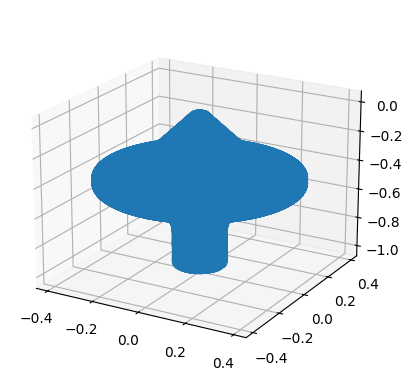

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)
ax.view_init(elev=20)

Lets find the moment of inertia about its center of mass

* $I_{x} = \sum_k m_k (y_k^2 + z_k^2)$
* $I_{y} = \sum_k m_k (x_k^2 + z_k^2)$
* $I_{z} = \sum_k m_k (x_k^2 + y_k^2)$
* $I_{xy} = I_{yx} = -\sum_k m_k x_k y_k$
* $I_{xz} = I_{zx} = -\sum_k m_k x_k z_k$
* $I_{yz} = I_{zy} = -\sum_k m_k y_k z_k$

But we're really interested in $\frac{I}{MR_0^2}$ so we also need to divide by $M=\sum_k m_k$ furthermore, since what's shown on the 3d plot is things like $x_k' = x_k/R_0$ our formula really looks like

$$\frac{I_x}{MR_0^2} = \frac{\sum_k m_k (y_k'^2 + z_k'^2)}{\sum_k m_k}$$

If we assume our objects have the same density everywhere, then all the $m_k's$ jsut equal $m$ and cancel to get

$$\boxed{\frac{I_x}{MR_0^2} = \frac{\sum_k(y_k'^2 + z_k'^2)}{N}}$$

where $N$ is the number of points in the object. The same goes for all the other formulas

Compute all components of matrix

In [17]:
N = coords.shape[1]
Ix = sum(coords[1]**2 + coords[2]**2)/N
Iy = sum(coords[0]**2 + coords[2]**2)/N
Iz = sum(coords[0]**2 + coords[1]**2)/N
Ixy = sum(coords[0]*coords[1])/N
Iyz = sum(coords[1]*coords[2])/N
Ixz = sum(coords[0]*coords[2])/N

Get matrix

In [18]:
I = np.array([[Ix, Ixy, Ixz],[Ixy, Iy, Iyz],[Ixz, Iyz, Iz]])
I

array([[ 3.02051158e-01,  7.86146394e-07, -2.44978075e-06],
       [ 7.86146394e-07,  3.02053663e-01, -5.61342133e-06],
       [-2.44978075e-06, -5.61342133e-06,  7.27951440e-02]])

And we have our matrix 

$$I = \begin{bmatrix}I_x & I_{xy} & I_{xz}\\ I_{yx} & I_{y} & I_{yz}\\ I_{zx} & I_{zy} & I_{z}\end{bmatrix}$$

In [19]:
pd.DataFrame(I).style.background_gradient(cmap='coolwarm', axis=None)

,0,1,2
0,0.302051,0.000001,-0.000002
1,0.000001,0.302054,-0.000006
2,-0.000002,-0.000006,0.072795
